In [1]:
def read_test_cases_from_txt(file_path):
    test_cases = []
    with open(file_path, 'r') as file:
        while True:
            N, M = map(int, file.readline().strip().split())
            if N == 0 and M == 0:
                break
            roads = []
            for _ in range(M):
                a, b, c = map(int, file.readline().strip().split())
                roads.append((a, b, c))
            test_cases.append({'N': N, 'M': M, 'roads': roads})
    return test_cases
test_cases = read_test_cases_from_txt("./Example_LAB6.txt")

# for i in test_cases:
#     print(i)

In [2]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)
    
    while queue:
        vertex = queue.popleft()
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)
                
    return visited

In [3]:
def dfs(graph, start, visited):
    visited.add(start)
    for neighbour in graph[start]:
        if neighbour not in visited:
            dfs(graph, neighbour, visited)
    return visited

In [4]:
# Initialize output list
outputBFS = []
outputDFS = []

# Iterate through each test case
# time complexity: O(N * (N + M))
for test in test_cases:
    N = test['N']
    M = test['M']
    roads = test['roads']
    
    # Initialize the graph
    graph = {i: [] for i in range(1, N+1)}
    
    # Populate the graph
    for a, b, c in roads:
        graph[a].append(b)
        if c == 2:
            graph[b].append(a)
    
    # Use BFS to check connectivity from each node
    is_fully_connected_BFS = all(len(bfs(graph, start)) == N for start in range(1, N+1))
    
    # Use DFS to check connectivity from each node
    is_fully_connected_DFS = all(len(dfs(graph, start, set())) == N for start in range(1, N+1))
    
    # Append the result to the output list
    outputBFS.append(1 if is_fully_connected_BFS else 0)
    outputDFS.append(1 if is_fully_connected_DFS else 0)

print(f"Output for BFS: {outputBFS}")
print(f"Output for DFS: {outputDFS}")

Output for BFS: [1, 1, 0, 1]
Output for DFS: [1, 1, 0, 1]


Test Case 1:


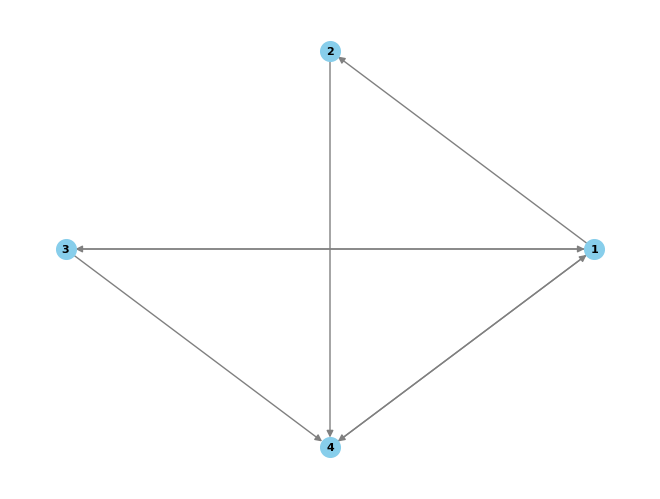

Test Case 2:


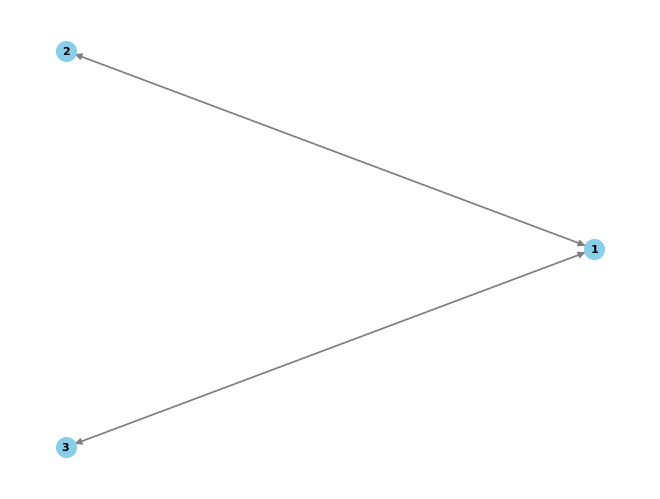

Test Case 3:


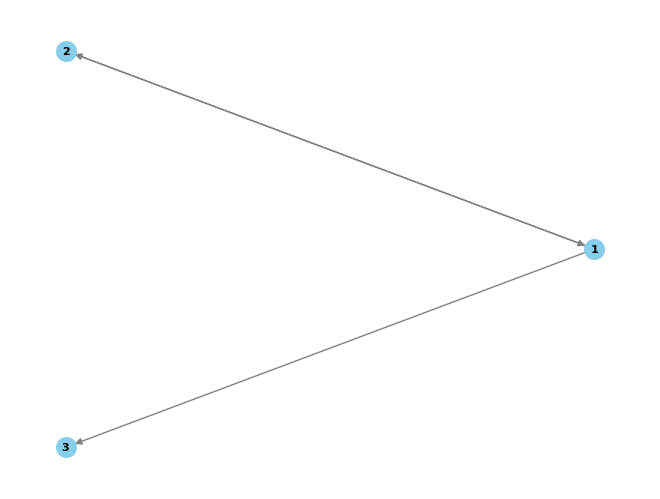

Test Case 4:


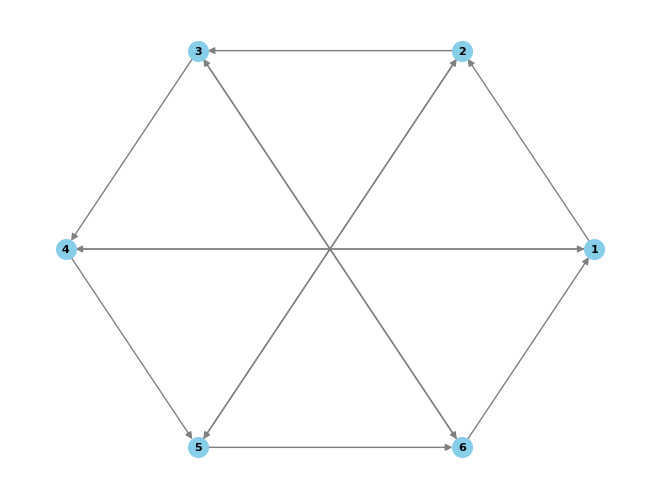

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to draw a graph based on the given roads (edges) and number of cities (nodes)
def draw_graph(N, roads):
    G = nx.DiGraph()  # Create a directed graph
    for i in range(1, N + 1):
        G.add_node(i)  # Add nodes to the graph

    for a, b, c in roads:
        G.add_edge(a, b)  # Add a directed edge for one-way and two-way roads
        if c == 2:
            G.add_edge(b, a)  # Add the reverse edge for two-way roads

    pos = nx.circular_layout(G)  # Use a circular layout for better visibility
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', font_size=8, node_size=200, font_color='black', edge_color='gray')
    plt.show()

# Draw graphs for each test case
for i, test in enumerate(test_cases):
    print(f"Test Case {i + 1}:")
    draw_graph(test['N'], test['roads'])